# Lesson 3 Assignment - Monty Hall Simulation
## Author - Emily McAfee

### Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases for switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies: switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy



#### Note: 
Please clearly outline the results and your recommendation with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [6]:
# One contenstant pick/establish variables
import random
import pandas as pd
%matplotlib inline

def contestant_pick(switch, numdoors = 3):
    
    # We (the host) know the car is behind door 1
    # Pick random door out of num doors
    chosen_door = random.randint(1, numdoors)
    
    if switch:
        # show goat
        revealed_door = 3 if chosen_door == 2 else 2
        
        # switch - can choose any other door than our initial and
        # hosts pick
        avail_doors = [doornum for doornum in range(1, numdoors + 1)
                      if doornum not in (chosen_door, revealed_door)]
        
        chosen_door = random.choice(avail_doors)
    
    # If you chose door number 1 you're a winner!
    return chosen_door == 1

In [7]:
# Many contestant picks
def contestant_picks(npicks, switch, numdoors = 3):
    nwins = 0
    for i in range(npicks):
        if contestant_pick(switch, numdoors):
            nwins += 1
    return nwins

numdoors, npicks = 3, 10000
withoutswitch = contestant_picks(npicks, False, numdoors)
withswitch = contestant_picks(npicks, True, numdoors)

print('wins without switching', (withoutswitch/npicks))
print('wins with switching', (withswitch/npicks))

wins without switching 0.3307
wins with switching 0.6687


In [8]:
# Visualize data
data = [['switch', withswitch/npicks],['noswitch', withoutswitch/npicks]]
df = pd.DataFrame(data, columns = ['approach', 'proportion_wins'])
df


,approach,proportion_wins
0,switch,0.6687
1,noswitch,0.3307


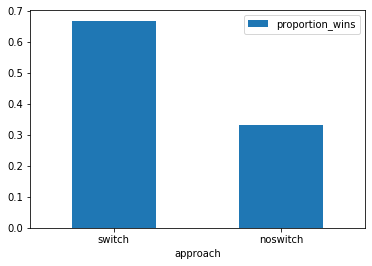

In [9]:
df.plot.bar(x = 'approach', y = 'proportion_wins', rot = 0)

# Insights
From this modeling we can see that switching doors yields about a 66% win rate, while NOT switching doors after the host has shown you one goat yields about a 33% win rate. Thus, the recommended strategy for this game show would be to switch doors.